# Text Retrieval and Mining - Data Science Minor - Assignment

Data Science Minor

Faculty of Economics and Business

University of Amsterdam

Authors: Claudia Orellana Rodriguez, [Julien Rossi](mailto://j.rossi@uva.nl)

# Student Group 30

* Timo Büscher
* Miras Kanatzhanov
* Victor Htema
* Burak Arslan

# Instructions

* This assignment is a group assignment
* Submit this notebook through Canvas
* The assignment is made of 3 questions
* The assignment includes an oral presentation in which you will describe your work and justify your answers

___


**GRADING**
* Question 1: 5 points
* Question 2: 10 points
* Question 3: 5 points


#Floods in Malawi

For this assigment you are provided a collection of news articles from Malawi's main news media - 4 news media in total. The articles, published between January and April 2019, cover the occurrence of floods around the country.

Using these text files, your assignment consists of 3 questions:

1.   Extract top-10 terms or keywords per document.

2.   Extract the polarity of each news article. The polarity tells us if a text is positive, negative, or neutral.

3. Extract the named entities mentioned in the news articles.


## Setup



## Dataset

* You can access the dataset here: https://raw.githubusercontent.com/j-rossi-nl/teaching-data/main/2024_TRTM/malawi_news_2019.txt
* It is one CSV file using `"\t"` as a separator
* It can be loaded into a pandas DataFrame using `pd.read_csv(URL, sep="\t")`
* The dataset is made of 137 news articles

## Tools

* SKLearn CountVectorizer, TfidfVectorizer, Lasso
* SpaCy [Documentation](https://spacy.io/usage)
* Textblob [Documentation](https://textblob.readthedocs.io/en/dev/)

In [3]:
!pip install spacy en_core_web_sm textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/j-rossi-nl/teaching-data/main/2024_TRTM/malawi_news_2019.txt", sep="\t")

# Question 1 - Keyword Extraction

* Identify 5 unigram keywords per article
* Identify 3 bigram keywords per article
* Within a document, a keywords are terms (either unigram or bigram) with the highest TFIDF coefficient
* Use TfidfVectorizer and set the parameters of the vectorizer
* A keyword should not be a stopword
* A keyword is lowercase
* A keyword is a lemma
* A keyword is a word with at least 2 letters
* Store the keywords into 2 columns:
  * `unigram_keywords` and `bigram_keywords`
  * as a string with keywords separated by comma, such as `flood, food, river, ...` or `major flood, ...`

In [28]:
# We import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# We initialize the stopwords and the NLP
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

In [30]:
#Once everything is set, we preprocess the data

def preprocess_text(text):

    # We initialize the word tokenize and remove stopwords as well as non-alphabetic tokens
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Then we lemmatize the data using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    return " ".join(lemmatized_tokens)

In [31]:
# Based on the previous preprocessing, we apply it to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

In [32]:
# We setup the TfidfVectorizer based on the given instructions
vec = TfidfVectorizer(
    lowercase=True,
    token_pattern=r"[a-z]{2,}",
)

In [33]:
# Based on the TI-IDF matrix we transform the processed text
tfidf_matrix = vec.fit_transform(df['processed_text'])
feature_names = vec.get_feature_names_out()

In [34]:
# By using this function, we get the top N keywords based on TFIDF
def get_top_keywords(row, feature_names, N):

    # We get indices of top N TFIDF values and the corresponding keywords
    dense_row = row.toarray().flatten()
    top_indices = dense_row.argsort()[-N:][::-1]
    keywords = [feature_names[i] for i in top_indices]

    return keywords

In [35]:
# Once we get the top keywords, we identify 5 unigram keywords per article
df['unigram_keywords'] = [get_top_keywords(row, feature_names, 5) for row in tfidf_matrix]

In [36]:
# We identify 3 bigram keywords per article
vec_bigram = TfidfVectorizer(
    lowercase=True,
    token_pattern=r"[a-z]{2,}",
    ngram_range=(2, 2)
)

tfidf_matrix_bigram = vec_bigram.fit_transform(df['processed_text'])
feature_names_bigram = vec_bigram.get_feature_names_out()

In [37]:
df['bigram_keywords'] = [get_top_keywords(row, feature_names_bigram, 3) for row in tfidf_matrix_bigram]

In [38]:
# As the keywords come in as lists, we convert them to comma-separated strings
df['unigram_keywords'] = df['unigram_keywords'].apply(lambda x: ', '.join(x))
df['bigram_keywords'] = df['bigram_keywords'].apply(lambda x: ', '.join(x))

In [39]:
# We finally drop the intermediate 'processed_text' column
df = df.drop(columns=['processed_text'])

In [40]:
df

,news_id,date,text,unigram_keywords,bigram_keywords
0,1,2019-01-11T10:32:21,Heavy rains which fell for about three hours i...,"kawale, bridge, damage, lilongwe, chipasula","also damage, lilongwe city, city council"
1,2,2019-03-10T09:48:43,The Department of Disaster Management Affairs ...,"search, rescue, provision, affect, operation","search rescue, provision relief, rescue operation"
2,3,2019-03-12T17:18:22,UN Secretary-General António Guterres has exte...,"un, guterre, wfp, children, nio","solidarity malawian, cause statement, involve ..."
3,4,2019-03-13T03:08:25,President Peter Mutharika on Tuesday assured M...,"proceed, president, die, balaka, hunger","visit district, die hunger, traditional authority"
4,5,2019-03-15T01:43:40,"From smiles of rains that crops are to grow, s...","learner, notebook, couple, school, reveal","phalombe district, due flood, hit lose"
...,...,...,...,...,...
132,133,2019-01-23T10:50:33,By Jameson Chauluka: Malawi is likely to exper...,"southern, statement, condition, read, storm","weather condition, heavy rain, include flush"
133,134,2019-03-20T10:25:56,By Feston Malekezo:The food security situation...,"increase, price, production, supply, expect","food security, crop loss, price maize"
134,135,2019-01-14T09:13:59,By Yohane Symon: Two people died in Mangochi D...,"two, burial, die, chimphepo, sleeping","die due, two people, due heavy"
135,136,2019-03-18T10:46:50,By Jameson Chauluka:Malawi Congress Party pres...,"chakwera, plan, flood, buy, downpour","heavy downpour, country plan, topic issuesschool"


#Question 2 - Sentiment Polarity

* Use Spacy Text Blob to assess the sentiment polarity of each news article
* Store this polarity number in a new column `"polarity"`
* Plot the distribution of the polarity across the corpus
* Create a machine learning pipeline to discover the words mostly associated to a positive polarity
  * CountVectorizer is used for vectorization
  * LogisticRegression will be used for classification with no intercept
  * Classify whether the sentiment polarity is negative or positive
  * Tune the hyperparameters:
    * `C` of LogisticRegression should be 5 values evenly spaced logarithmically from `10**-2` to `10**2`
    * limit the vocabulary to `100` words or no limit
* Evaluate and report on your model
* Show the 3 words with the highest weight

In [41]:
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
2024-01-30 17:35:51.627253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-

In [42]:
import spacy
!pip install spacytextblob
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from textblob import TextBlob # use this for polarity
import warnings # to turn off the warnings during
import matplotlib.pyplot as plt

In [44]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity) # we use TextBlob on every document and the result returned by this function has an attribute .sentiment.polarity.
df['sentiment'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0) # for classifying we made a dummy that's one for positive polarity and 0 for the rest

In [45]:
warnings.filterwarnings("ignore") # turn off the user warnings during calculations

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=322) # then we split into a train and test set


In [46]:
pipeline = make_pipeline(CountVectorizer(), # we create a positive polarity pipeline with CountVectorizer and LogisticRegression
                         LogisticRegression(fit_intercept=False)
                         )
param_grid = {
    'countvectorizer__max_features': [None, 100],
    'logisticregression__C': np.logspace(-2, 2, 5),
}

In [47]:
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5) # we chose F1 score over accuracy because our polarity data is not balanced
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(fit_intercept=False))]),
             param_grid={'countvectorizer__max_features': [None, 100],
                         'logisticregression__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='f1')

In [48]:
y_pred = grid_search.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred)) # we chose F1 score over accuracy because our polarity data is not balanced

coefficients = grid_search.best_estimator_.named_steps['logisticregression'].coef_[0]
feature_names = grid_search.best_estimator_.named_steps['countvectorizer'].get_feature_names_out() # get coefficients and feature names

top_coefficients = sorted(zip(coefficients, feature_names), reverse=True)[:3] # we use it to get the top 3 coefficients and corresponding feature names

for coef, feature in top_coefficients: # print the top coefficients and feature names
    print(f"Polarity coefficient: {coef}, Feature: {feature}")

F1 Score: 0.7906976744186046
Polarity coefficient: 0.08173225810551238, Feature: with
Polarity coefficient: 0.060177908614685756, Feature: more
Polarity coefficient: 0.0486191356763381, Feature: disasters


In [49]:
df

,news_id,date,text,unigram_keywords,bigram_keywords,polarity,sentiment
0,1,2019-01-11T10:32:21,Heavy rains which fell for about three hours i...,"kawale, bridge, damage, lilongwe, chipasula","also damage, lilongwe city, city council",-1.061448e-01,0
1,2,2019-03-10T09:48:43,The Department of Disaster Management Affairs ...,"search, rescue, provision, affect, operation","search rescue, provision relief, rescue operation",-7.857143e-02,0
2,3,2019-03-12T17:18:22,UN Secretary-General António Guterres has exte...,"un, guterre, wfp, children, nio","solidarity malawian, cause statement, involve ...",-4.083333e-02,0
3,4,2019-03-13T03:08:25,President Peter Mutharika on Tuesday assured M...,"proceed, president, die, balaka, hunger","visit district, die hunger, traditional authority",1.592262e-01,1
4,5,2019-03-15T01:43:40,"From smiles of rains that crops are to grow, s...","learner, notebook, couple, school, reveal","phalombe district, due flood, hit lose",-5.551115e-18,0
...,...,...,...,...,...,...,...
132,133,2019-01-23T10:50:33,By Jameson Chauluka: Malawi is likely to exper...,"southern, statement, condition, read, storm","weather condition, heavy rain, include flush",4.909910e-02,1
133,134,2019-03-20T10:25:56,By Feston Malekezo:The food security situation...,"increase, price, production, supply, expect","food security, crop loss, price maize",-1.290476e-02,0
134,135,2019-01-14T09:13:59,By Yohane Symon: Two people died in Mangochi D...,"two, burial, die, chimphepo, sleeping","die due, two people, due heavy",7.450980e-02,1
135,136,2019-03-18T10:46:50,By Jameson Chauluka:Malawi Congress Party pres...,"chakwera, plan, flood, buy, downpour","heavy downpour, country plan, topic issuesschool",8.205128e-02,1


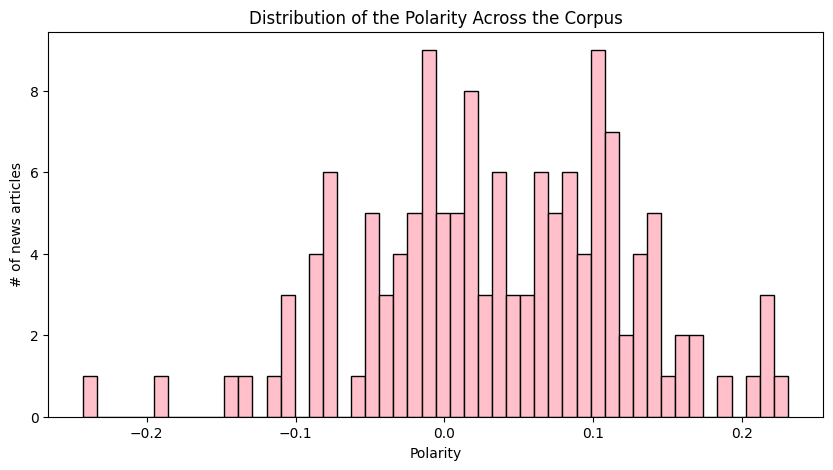

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(df['polarity'], bins=50, color='pink', edgecolor='black', alpha=1) # plotting the distribution of the Polarity Across the Corpus
plt.title('Distribution of the Polarity Across the Corpus')
plt.xlabel('Polarity')
plt.ylabel('# of news articles')
plt.show()

# Question 3 - Entities



* An **ENTITY** is a word, or group of multiple words that is of a particular type ("one" and "two thousands" are numbers, "September 1st 2023" and "01-09-2023" are dates, "Michael Jordan" is a person's name, "River Gange" is a place's name)
* Identifying entities in a text is a "Named Entity Recognition" task
* You can check this in the Spacy [Documentation](https://spacy.io/universe/project/video-spacys-ner-model-alt)
* Use Spacy to identify all of the named entities in the articles
* Use the model `en_core_web_sm`
* Create a dataframe `entities` with columns `text` and `label`
* Which are the top-3 most frequent labels ?
* Which are the top-3 most frequent entity text for "ORG" label ?
* Same question for the "PERSON" label ?

In [16]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
# We make a function to extract the entities from the text
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities
df['entities'] = df['text'].apply(extract_entities)

In [18]:
# We create a Dataframe to store the text entities and the labels
df_entities = pd.DataFrame(columns=['text', 'label'])

for _, row in df.iterrows():
    for entity in row['entities']:
        df_entities = df_entities._append({'text': entity[0], 'label': entity[1]}, ignore_index=True)

In [19]:
# We compute the frequency of every label and choose the 3 most frequent labels

label_count = df_entities['label'].value_counts()
print(f" Top 3 most frequent labels:\n{label_count.head(3)}")

 Top 3 most frequent labels:
label
ORG         1051
PERSON       981
CARDINAL     651
Name: count, dtype: int64


In [20]:
# We compute the frequency of each entity text for the ORG labels and we choose the 3 most frequent entity texts

org_entities = df_entities[df_entities['label'] == 'ORG']
top3_org_entities = org_entities['text'].value_counts()
print(f"Top-3 most frequent entity texts for ORG label:n\ {top_org_entities.head(3)}")

Top-3 most frequent entity texts for ORG label:n\ text
Chikwawa                                         34
MCP                                              20
the Department of Disaster Management Affairs    20
Name: count, dtype: int64


In [21]:
# We compute the frequency of each entity text for the PERSON labels and we choose the 3 most frequent entity texts

person_entities = df_entities[df_entities['label'] == 'PERSON']
top3_person_entities = person_entities['text'].value_counts()
print(f"Top-3 most frequent entity texts for PERSON label: n\ {top_person_entities.head(3)}")

Top-3 most frequent entity texts for PERSON label: n\ text
Malawi             174
Sharing             81
Peter Mutharika     23
Name: count, dtype: int64
